# Example: Zinc Powder from a Supplier

Let's describe an instance of some zinc powder with a set of properties defined in the specification sheet from the manufacturer!


In [17]:
# Install and import dependencies
!pip install jsonschema rdflib requests matplotlib > /dev/null

import json
import rdflib
import requests
import sys
from IPython.display import Image, display
import matplotlib.pyplot as plt

The JSON-LD data that we will use is:

In [18]:
jsonld = {
  "@context": "https://raw.githubusercontent.com/emmo-repo/domain-electrochemistry/master/context.json",
  "@type": ["Zinc", "Powder"],
  "schema:manufacturer": {
      "@id": "https://www.wikidata.org/wiki/Q680841",
      "schema:name": "Sigma-Aldrich"
  },
  "schema:productID": "324930",
  "schema:url": "https://www.sigmaaldrich.com/NO/en/product/aldrich/324930",
  "hasProperty": [
      {
        "@type": ["D95ParticleSize", "ConventionalProperty"],
        "hasNumericalPart": {
              "@type": "Real",
              "hasNumericalValue": 150
        },
        "hasMeasurementUnit": "emmo:MicroMetre",
        "dc:source": "https://www.sigmaaldrich.com/NO/en/product/aldrich/324930"
      }
  ]
}

Now let's see how a machine would process this by reading it into an RDF Graph! We can then use SPARQL to write a query and list all the things the machine thinks is in this file...

In [19]:
# Create a new graph
g = rdflib.Graph()

g.parse(data=json.dumps(jsonld), format="json-ld")

query_all = """
SELECT ?subject ?predicate ?object
WHERE {
  ?subject ?predicate ?object
}
"""

# Execute the SPARQL query
all_the_things = g.query(query_all)

# Print the results
for row in all_the_things:
    print(row)


(rdflib.term.BNode('Nc41f2c7bf5bd497e9161e124fe2bfc66'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('https://w3id.org/emmo/domain/chemicalsubstance#substance_9bd78e1c_a4dc_41b6_8013_adb51df1ffdc'))
(rdflib.term.BNode('Nc41f2c7bf5bd497e9161e124fe2bfc66'), rdflib.term.URIRef('https://schema.org/manufacturer'), rdflib.term.URIRef('https://www.wikidata.org/wiki/Q680841'))
(rdflib.term.BNode('Nd2170694b6284f04aea18b7229390552'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://emmo.info/emmo#EMMO_18d180e4_5e3e_42f7_820c_e08951223486'))
(rdflib.term.BNode('N0b3d6babf6ed4b289629f69ed796200c'), rdflib.term.URIRef('http://emmo.info/emmo#EMMO_8ef3cd6d_ae58_4a8d_9fc0_ad8f49015cd0'), rdflib.term.BNode('Nd2170694b6284f04aea18b7229390552'))
(rdflib.term.BNode('Nc41f2c7bf5bd497e9161e124fe2bfc66'), rdflib.term.URIRef('https://schema.org/productID'), rdflib.term.Literal('324930'))
(rdflib.term.BNode('N0b3d6b

Now, let's write a SPARQL query to get back some specific thing...like what is the name of the manufacturer?

In [20]:
query = """
PREFIX schema: <https://schema.org/>

SELECT ?manufacturerName
WHERE {
  ?product schema:manufacturer ?manufacturer .
  ?manufacturer schema:name ?manufacturerName .
}
"""

# Execute the SPARQL query
results = g.query(query)

# Print the results
for row in results:
    print(row)


(rdflib.term.Literal('Sigma-Aldrich'),)


In [21]:
endpoint_url = "https://query.wikidata.org/sparql"

# SPARQL query to get the mass of zinc (Q758)
query = """
SELECT ?mass WHERE {
  wd:Q758 wdt:P2067 ?mass .
}
"""

# Set headers for request
headers = {"User-Agent": "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])}

# Execute the request
response = requests.get(endpoint_url, headers=headers, params={'query': query, 'format': 'json'})
data = response.json()

# Extract and print the mass value
mass = data['results']['bindings'][0]['mass']['value']
print(f"Mass of Zinc: {mass}")


Mass of Zinc: 65.38


In [22]:
# SPARQL query to get the image of zinc (Q758)
query = """
SELECT ?image WHERE {
  wd:Q758 wdt:P18 ?image .
}
"""

# Set headers for request
headers = {"User-Agent": "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])}

# Execute the request
response = requests.get(endpoint_url, headers=headers, params={'query': query, 'format': 'json'})
data = response.json()

# Extract and display the image URL
if data['results']['bindings']:
    image_url = data['results']['bindings'][0]['image']['value']
    print(f"Image of Zinc: {image_url}")
    display(Image(url=image_url, width=300, height=300))  # Adjust width and height as needed

else:
    print("No image found for Zinc.")

Image of Zinc: http://commons.wikimedia.org/wiki/Special:FilePath/Zinc%20fragment%20sublimed%20and%201cm3%20cube.jpg


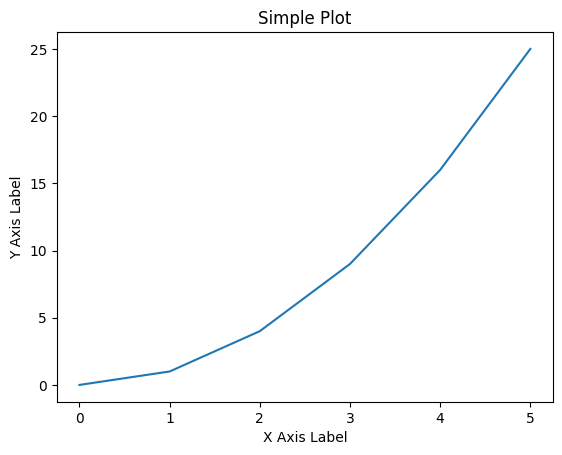

In [23]:
# Sample data
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot data
ax.plot(x, y)

# Set labels and title
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')
ax.set_title('Simple Plot')

# Display the plot
plt.show()